In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client, LocalCluster 
cluster = LocalCluster() # Launches a scheduler and workers locally 
client = Client(cluster)

In [3]:
from pyextremes import EVA

In [4]:
base_path = '/datasets/work/oa-vankirap/work/'

In [5]:
coastpoints_ds=xr.load_dataset(f'{base_path}/schism/EVA/Hindcast_v3_coastal_points_schism_elev.nc', chunks='auto')

In [6]:
coastpoints_eva_df = pd.read_csv(f'{base_path}/schism/EVA/Hindcast_v3_coastal_points_schism_elev_POT_GPD_ARI_20230717.csv')

In [7]:
coastpoints_eva_df

,index,longitude,latitude,node_idx,kns,node_lons,node_lats,depth,mean,max,...,scale,10,10 lower ci,10 upper ci,50,50 lower ci,50 upper ci,100,100 lower ci,100 upper ci
0,0,169.773350,-20.247186,97728,5,169.77207,-20.24632,1.11,0.026832,1.196230,...,0.037449,0.965534,0.898102,1.065252,1.160328,1.016884,1.427835,1.265802,1.075178,1.653150
1,1,169.770549,-20.250329,97735,10,169.77167,-20.25469,0.37,0.071855,1.423918,...,0.040661,1.055046,0.980502,1.142515,1.304213,1.116424,1.549063,1.443666,1.180462,1.805940
2,2,169.773350,-20.247186,97728,5,169.77207,-20.24632,1.11,0.026832,1.196230,...,0.037449,0.965534,0.897236,1.025884,1.160328,1.013089,1.317835,1.265802,1.069573,1.494044
3,3,169.793537,-20.236394,97922,10,169.79625,-20.23786,0.00,0.034949,1.221539,...,0.039359,0.947707,0.900178,1.014580,1.109514,1.012336,1.268697,1.193293,1.065205,1.415347
4,4,169.799074,-20.238329,97922,10,169.79625,-20.23786,0.00,0.034949,1.221539,...,0.039359,0.947707,0.892981,1.027967,1.109514,0.989341,1.296720,1.193293,1.032661,1.466185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,2372,166.556237,-13.102088,3282,10,166.55187,-13.10117,26.20,0.066854,0.987597,...,0.078131,0.948487,0.932438,0.963942,0.982590,0.958119,1.008504,0.993811,0.965668,1.025170
2373,2373,166.554650,-13.099013,3238,10,166.54969,-13.09718,24.12,0.066938,0.987741,...,0.078033,0.948656,0.925399,0.962718,0.982878,0.950893,1.005514,0.994151,0.958214,1.021022
2374,2374,166.549171,-13.089432,3210,10,166.54820,-13.09304,7.08,0.066774,0.987676,...,0.077981,0.948461,0.933730,0.964346,0.982707,0.961103,1.007702,0.993993,0.969195,1.023618
2375,2375,166.545624,-13.084301,3141,10,166.54499,-13.09000,19.89,0.066788,0.988460,...,0.078249,0.949233,0.933186,0.967416,0.983324,0.960453,1.015138,0.994540,0.968825,1.032765


      index   longitude   latitude  node_idx  kns  node_lons  node_lats  \
2376   2376  166.547661 -13.072537      3164    5   166.5459   -13.0728   

      depth     mean       max  ...     scale        10  10 lower ci  \
2376   2.71  0.06307  0.995547  ...  0.077141  0.944162     0.924623   

      10 upper ci        50  50 lower ci  50 upper ci      100  100 lower ci  \
2376      0.96348  0.979952     0.952439     1.012346  0.99187      0.960698   

      100 upper ci  
2376      1.029403  

[1 rows x 23 columns]


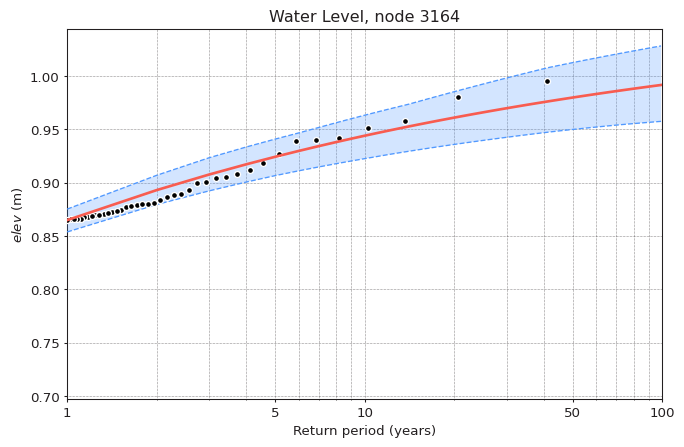

In [8]:
idx = 2376


row=coastpoints_eva_df.iloc[[idx]].copy()
print(row)
node_idx = row['node_idx'].values[0]
data = coastpoints_ds.elev.isel(index=idx).to_series()
model = EVA(data)
thres = np.percentile(data, 99.)
model.get_extremes(method="POT", threshold=thres, r="24H")
model.fit_model()

fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
ax.set_title(f'Water Level, node {node_idx}')
ax.set_ylabel('$elev$ (m)')
ax.set_xticks([1,5,10,50,100])
ax.set_xlim([1,100])
ax.set_xlabel('Return period (years)')
plt.show()
    # fig.savefig(f'{base_path}/schism/EVA/plots/SCHISM_Hindcastv3_RIplot_elev_node_{node_idx}.png')
    # plt.close()

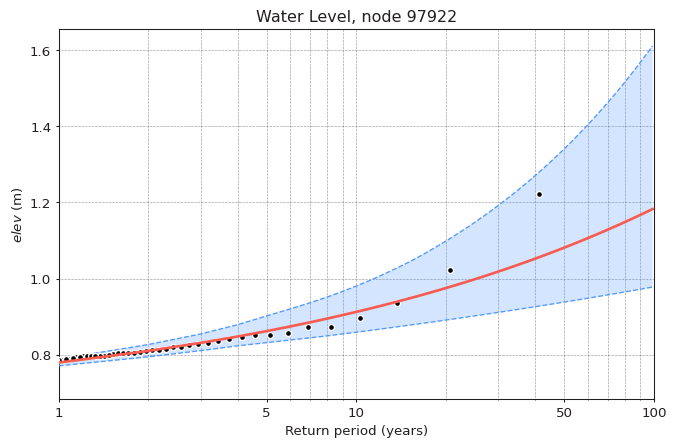

In [9]:
idx = 3

row=coastpoints_eva_df.iloc[[idx]].copy()
node_idx = row['node_idx'].values[0]
data = coastpoints_ds.elev.isel(index=idx).to_series()
model = EVA(data)
thres = np.percentile(data, 99.8)
model.get_extremes(method="POT", threshold=thres, r="24H")
model.fit_model()

fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
ax.set_title(f'Water Level, node {node_idx}')
ax.set_ylabel('$elev$ (m)')
ax.set_xticks([1,5,10,50,100])
ax.set_xlim([1,100])
ax.set_xlabel('Return period (years)')
plt.show()

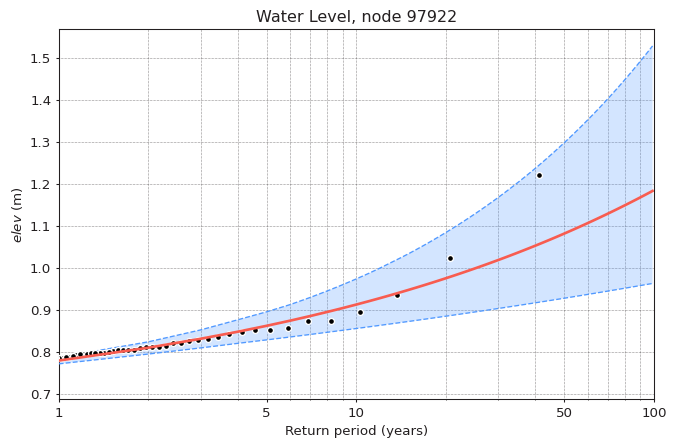

In [10]:
idx = 3

row=coastpoints_eva_df.iloc[[idx]].copy()
node_idx = row['node_idx'].values[0]
data = coastpoints_ds.elev.isel(index=idx).to_series()
model = EVA(data)
thres = np.percentile(data, 99.8)
model.get_extremes(method="POT", threshold=thres, r="24H")
model.fit_model()

fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
ax.set_title(f'Water Level, node {node_idx}')
ax.set_ylabel('$elev$ (m)')
ax.set_xticks([1,5,10,50,100])
ax.set_xlim([1,100])
ax.set_xlabel('Return period (years)')
plt.show()

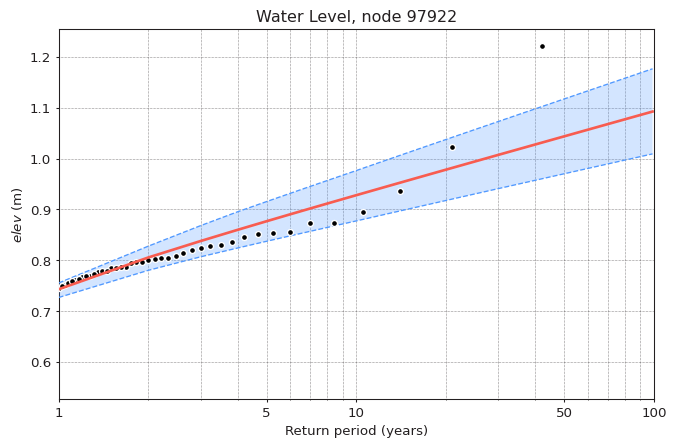

In [11]:
idx = 3

row=coastpoints_eva_df.iloc[[idx]].copy()
node_idx = row['node_idx'].values[0]
data = coastpoints_ds.elev.isel(index=idx).to_series()
model = EVA(data)

model.get_extremes(method="BM", block_size=f"{365.2425/2}D")
model.fit_model()

fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
ax.set_title(f'Water Level, node {node_idx}')
ax.set_ylabel('$elev$ (m)')
ax.set_xticks([1,5,10,50,100])
ax.set_xlim([1,100])
ax.set_xlabel('Return period (years)')
plt.show()

In [14]:
stride = 25
for idx in np.arange(0, len(coastpoints_eva_df.index)+1, stride):
    row=coastpoints_eva_df.iloc[[idx]]
    node_idx = row['node_idx'].values[0]
    data = coastpoints_ds.elev.isel(index=idx).to_series()
    model = EVA(data)
    thres = np.percentile(data, 99.8)
    model.get_extremes(method="POT", threshold=thres, r="24H")
    model.fit_model()
    
    fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
    ax.set_title(f'Water Level, node {node_idx}')
    ax.set_ylabel('$elev$ (m)')
    ax.set_xticks([1,5,10,50,100])
    ax.set_xlim([1,100])
    ax.set_xlabel('Return period (years)')
    fig.savefig(f'{base_path}/schism/EVA/plots/SCHISM_Hindcastv3_RIplot_elev_node_{node_idx}.png')
    # fig.clear()
    plt.close()

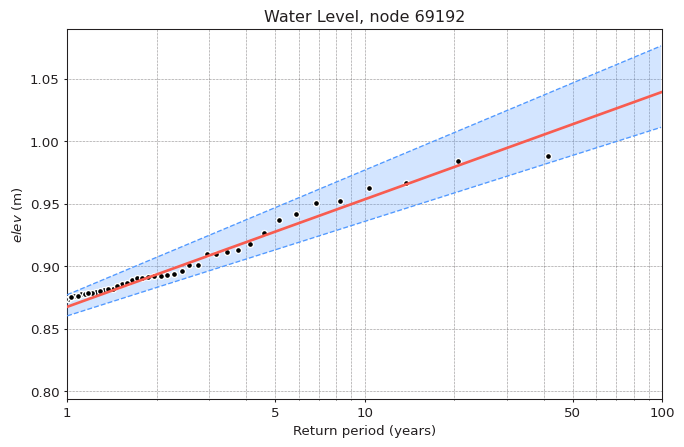

In [24]:
node_idx = 69192
row=coastpoints_eva_df.loc[coastpoints_eva_df['node_idx']==node_idx]
node_idx = row['node_idx'].values[0]
data = coastpoints_ds.elev.isel(index=idx).to_series()
model = EVA(data)
thres = np.percentile(data, 99.8)
model.get_extremes(method="POT", threshold=thres, r="24H")
model.fit_model()

fig,ax =  model.plot_return_values(return_period=np.arange(1,100,1), alpha=0.95)
ax.set_title(f'Water Level, node {node_idx}')
ax.set_ylabel('$elev$ (m)')
ax.set_xticks([1,5,10,50,100])
ax.set_xlim([1,100])
ax.set_xlabel('Return period (years)')
# fig.savefig(f'{base_path}/schism/EVA/plots/SCHISM_Hindcastv3_RIplot_elev_node_{node_idx}.png')
# # fig.clear()
# plt.close()
plt.show()

In [15]:
coastpoints_eva_df['node_idx']==

0       False
1       False
2       False
3       False
4       False
        ...  
2372    False
2373    False
2374    False
2375    False
2376    False
Name: node_idx, Length: 2377, dtype: bool

In [18]:
row=coastpoints_eva_df.loc[coastpoints_eva_df['node_idx']==98477]